---
# Type de données Partition
---
NB : Les différentes applications devront mettre en valeur le type 'partition'.


# utf8 et imports

In [2]:
#coding: utf-8

import numpy as np
from graphviz import Digraph, Graph
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter

print("Imported")

Imported


# Une fonction qui renvoie un mélange d'une liste
La fonction mélange prend une liste $L$ en entrée, et un entier $n$ optionnel.

Elle renvoie un mélange équiprobable de $L$ si $n$ n'est pas précisé, et une liste de $n$ éléments distincts pris dans $L$ de façon aléatoire sinon.

NB : le but n'est pas d'appeler une fonction d'une bibliothèque mais de trouver un algorithme répondant à cette question, le seul outil aléatoire autorisé est la fonction `random.randint`

In [3]:
def melange(L, n = -1):
    if n < 0:
        n = len(L)
    out = L.copy()
    for i in range(len(L)):
        swap_addr = random.randint(0, len(L) - 1)
        out[i], out[swap_addr] = out[swap_addr], out[i]
    return out[:n]

In [4]:
L1 = [1,2,3,6,15]
L1_m = melange(L1)
L1_m3 = melange(L1, 3)

print(L1)
print(L1_m)
print(L1_m3)

[1, 2, 3, 6, 15]
[3, 6, 2, 15, 1]
[6, 1, 15]


# Implémentation du type Partition Méthode 1

In [5]:
class PartitionEntiers:
    
    def __init__(self, n = 0):
        self.representant = list(range(n))
        self.nb_elt = n
        
    def ajouter(self):
        self.representant.append(self.nb_elt)
        self.nb_elt += 1
        
    def trouver_representant(self, k):
        return self.representant[k]
    
    def trouver_classe(self, k):
        r_k = self.trouver_representant(k)
        return [i for i in range(self.nb_elt) if self.trouver_representant(i) == r_k]
        
    def fusionner(self, k, l):
        r_k = self.trouver_representant(k)
        r_l = self.trouver_representant(l)
        
        for i in range(self.nb_elt):
            if self.representant[i] == r_l :
                self.representant[i] = r_k
    
    def lister_partition(self):
        part = [[] for _ in range(self.nb_elt)]
        
        for i in range(self.nb_elt) :
            part[self.trouver_representant(i)].append(i)

 

        return [c for c in part if len(c) != 0]     
    
    def dessiner(self):
        dot = Graph()
        
        for i in range(self.nb_elt):
            dot.node(str(i))
            
        for i in range(self.nb_elt):
            dot.edge(str(i), str(self.trouver_representant(i)))
        
        display(dot)

# Test méthode 1

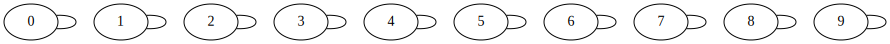

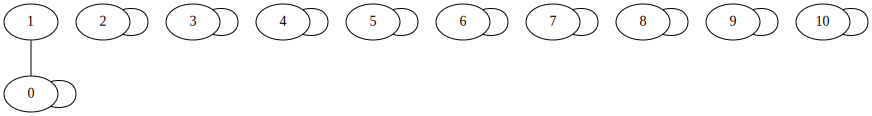

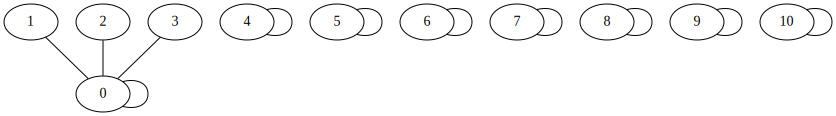

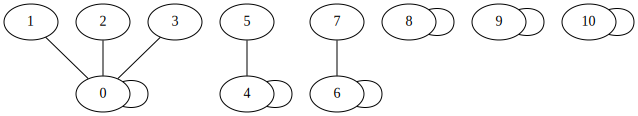

[[0, 1, 2, 3], [4, 5], [6, 7], [8], [9], [10]]


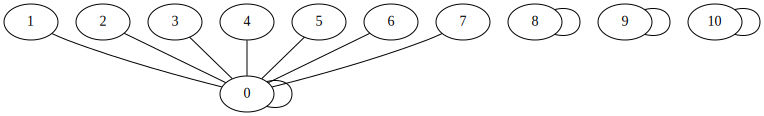

[0, 1, 2, 3, 4, 5, 6, 7]
0


In [6]:
tmp = PartitionEntiers(10)
tmp.dessiner()
tmp.ajouter()
tmp.fusionner(0, 1)
tmp.dessiner()
tmp.fusionner(2, 3)
tmp.fusionner(1, 3)
tmp.dessiner()
tmp.fusionner(4, 5)
tmp.fusionner(6, 7)
tmp.dessiner()
print(tmp.lister_partition())
tmp.fusionner(4, 7)
tmp.fusionner(2, 6)
tmp.dessiner()

 

print(tmp.trouver_classe(3))
print(tmp.trouver_representant(3))

# Implémentation des types Partition Méthode 2

In [7]:
class PartitionEntiers2:
    def __init__(self, n = 0):
        self.mere = list(range(n))
        self.hauteurs = [0] * n
        self.nb_elements = n
    
    def ajouter(self):
        self.mere.append(self.nb_elements)
        self.hauteurs.append(0)
        self.nb_elements += 1
    
    def trouver_representant(self, k):
        while k != self.mere[k]:
            k = self.mere[k]
        return k
    
    def trouver_classe(self, k):
        r_k = self.trouver_representant(k)
        return [i for i in range(self.nb_elements) if self.trouver_representant(i) == r_k]
    
    def fusionner(self, k, l):
        r_k = self.trouver_representant(k)
        r_l = self.trouver_representant(l)
        h_k = self.hauteurs[r_k]
        h_l = self.hauteurs[r_l]
        if h_k < h_l:
            self.mere[r_k] = r_l
        elif h_l < h_k:
            self.mere[r_l] = r_k
        else:
            self.mere[r_k] = r_l
            self.hauteurs[r_l] += 1
    
    def lister_partition(self):
        part = [[] for _ in range(self.nb_elements)]
        for i in range(self.nb_elements):
            part[self.trouver_representant(i)].append(i)
        return [c for c in part if len(c) > 0]
    
    def dessiner(self):
        dot = Graph()
        for i in range(self.nb_elements):
            dot.node(str(i))
        for i in range(self.nb_elements):
            dot.edge(str(i), str(self.mere[i]))
        display(dot)

# Test méthode 2

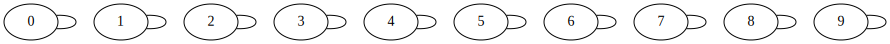

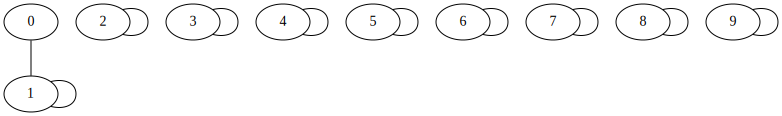

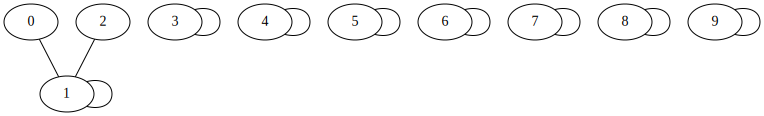

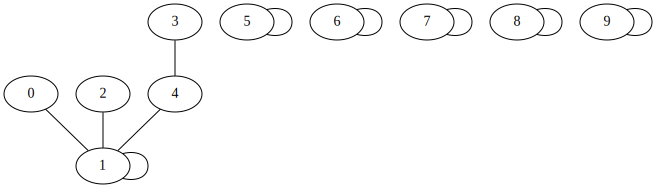

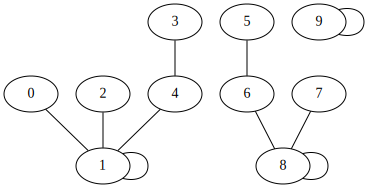

[[0, 1, 2, 3, 4], [5, 6, 7, 8], [9]]


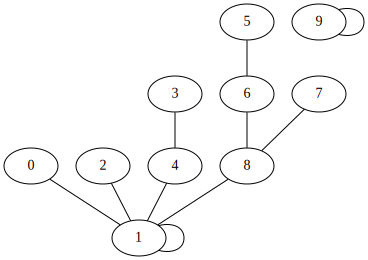

In [8]:
tmp = PartitionEntiers2(10)
tmp.dessiner()


tmp.fusionner(0, 1)
tmp.dessiner()

tmp.fusionner(2, 1)
tmp.dessiner()

tmp.fusionner(3, 4)
tmp.fusionner(3, 0)
tmp.dessiner()

tmp.fusionner(5, 6)
tmp.fusionner(7, 8)
tmp.fusionner(5, 8)
tmp.dessiner()
print(tmp.lister_partition())
tmp.fusionner(7, 4)
tmp.dessiner()

---
# Outil : graphes

##  Graphe non orienté

Un graphe non orienté sera ici représenté par un couple :
- liste des sommets
- liste des arrètes  

L'arrête qui relie les sommets A et B est le couple $(i, j)$ où $i$ et $j$ sont respectivement les indices de A et B dans la liste des sommets. Le fait que le graphe soit non orienté sera implémenté en ne considérant que des arêtes $(i, j)$ avec $j <i$.

### Création d'un graphe aléatoire
Ecrire une fonction qui renvoie un graphe non orienté aléatoire de $n$ noeuds et $p$ arêtes.

In [9]:
def graph(nbVertices, nbEdges):
    if nbVertices < 27:
        mot = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z"
        vertices = mot.split(" ")
        vertices= vertices[:nbVertices]
    else:
        vertices = ["A"+str(i) for i in range(nbVertices)]
       
    edges = [(j,i) for i in range(nbVertices) for j in range(i)]
    edges = melange(edges)
    edges = edges[:nbEdges]
   
    return (vertices,edges)


### Représentation du graphe
Ecrire une fonction qui représente, grâce au module *graphviz*, un graphe non orienté.

In [10]:
def drawGraph(g):
    dot = Graph()
    vertices, edges = g
    for v in vertices:
        dot.node(v)
    for e in edges:
        startIndex,endIndex = e
        start = vertices[startIndex]
        end = vertices[endIndex]
        dot.edge(str(start), str(end))
           
    display(dot)

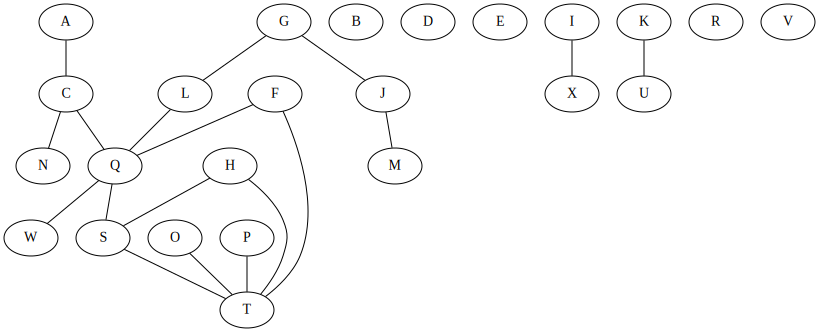

In [11]:
g = graph(24, 18)

drawGraph(g)

## Graphe valué
Un graphe orienté valué sera ici représenté par un couple :
- liste des sommets
- liste des arcs valuées 

L'arc valué de A vers B avec une valuation v est le triplet (i, j, v) où i et j sont respectivement les indices de A et B dans la liste des sommets.

### Création du graphe orienté valué
Ecrire une fonction qui renvoie un graphe orienté valué aléatoire de $n$ noeuds et $p$ arêtes. Les valuations seront des entiers alétoires dans $[1..10]$.

In [12]:
def valuedGraph(nbVertices, nbEdges):
    if nbVertices < 27:
        mot = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z"
        vertices = mot.split(" ")
        vertices= vertices[:nbVertices]
    else:
        vertices = ["A"+str(i) for i in range(nbVertices)]
       
    edges = [(j,i,random.randint(1,10)) for i in range(nbVertices) for j in range(i)]
    edges = melange(edges)
    edges = edges[:nbEdges]
    
   
    return (vertices,edges)

### Représentation d'un graphe orienté valué
Ecrire une fonction qui représente, grâce au module *graphviz*, un graphe orienté valué.

In [13]:
def drawValuedGraph(vg):
    dot = Digraph()

    vertices, edges = vg
    for v in vertices:
        dot.node(v)
    for e in edges:
        startIndex,endIndex,weight = e
        start = vertices[startIndex]
        end = vertices[endIndex]
        dot.edge(str(start), str(end), label=str(weight))

    display(dot)

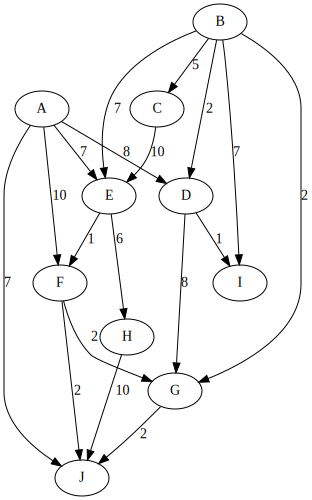

(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], [(1, 3, 2), (4, 5, 1), (0, 4, 7), (4, 7, 6), (1, 2, 5), (5, 6, 2), (7, 9, 10), (3, 6, 8), (0, 9, 7), (3, 8, 1), (1, 8, 7), (1, 6, 2), (1, 4, 7), (5, 9, 2), (6, 9, 2), (0, 3, 8), (0, 5, 10), (2, 4, 10)])


In [14]:
vg = valuedGraph(10, 18)

drawValuedGraph(vg)
print(vg)

---
# Composantes connexes d'un graphe non orienté
Calculer les composantes connexes d'un graphe non orienté.

In [15]:
def connectedComponents(g):
    sommets, aretes = g
    p = PartitionEntiers2(len(sommets))
   
    for d, a in aretes :
        p.fusionner(d, a)
       
    return [[sommets[i] for i in c] for c in p.lister_partition()]

In [16]:
print(connectedComponents(g))

[['B'], ['D'], ['E'], ['R'], ['A', 'C', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'S', 'T', 'W'], ['K', 'U'], ['V'], ['I', 'X']]


---
# Arbre couvrant de poids minimal
Calculer un arbre couvrant de poids minimal d'un graphe orienté valué.

On pourra considérer qu'il existe un sommet virtuel, relié à tous les autres sommets par un arc de poids gigantesque (ce qui résoud le problème d'absence d'arbre couvrant dans le graphe de départ).

In [17]:
def connectedComponentsW(g):
    sommets, aretes = g
    p = PartitionEntiers2(len(sommets))
   
    for d, a, _ in aretes :
        p.fusionner(d, a)
       
    return [[sommets[i] for i in c] for c in p.lister_partition()]

def minimumSpanningTree(g):
    # Trier les arêtes par coût croissant
    V, E = g
    Es = sorted(E, key=lambda arc: arc[2])
    T = [V, []]
    
    # Parcourir chaque arête par coût croissant, si l'arête crée une nouvelle composante connexte, l'ajouter à l'arbre
    for arc in Es:
        prev = connectedComponentsW(T)
        T_tmp = (V, T[1] + [arc])
        new = connectedComponentsW(T_tmp)
        if len(prev) > len(new):
            T[1] = T[1] + [arc]
    
    return T
    

[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 [(4, 5, 1),
  (3, 8, 1),
  (1, 3, 2),
  (5, 6, 2),
  (1, 6, 2),
  (5, 9, 2),
  (1, 2, 5),
  (4, 7, 6),
  (0, 4, 7)]]

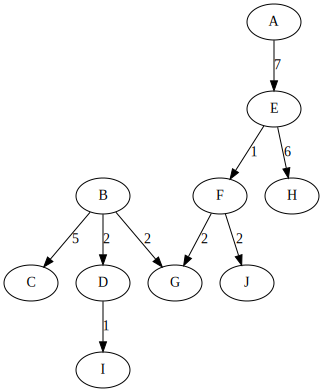

In [18]:
display(minimumSpanningTree(vg))
drawValuedGraph(minimumSpanningTree(vg))

---
# Création d'un labyrynthe
Soit un rectangle de dimensions entières n x p. Construire un labyrinthe aléatoire respectant la contrainte : pour tout couple de case (u,v), il existe un et un seul chemin menant de u à v.

Le côté aléatoire devra, sans preuve demandée, générer un labyrynthe de façon équiprobable parmi tous les labyrynthes respectant la contrainte imposée.

Le labyrynthe devra être représenté graphiquement.

Avant de commencer : comment appelle-t-on un graphe non orienté vérifiant "pour tout couple de sommets (u,v), il existe un et un seul chemin reliant u et v"
NB : La solution proposée doit mettre en oeuvre le type Partition.


### Idée
- On considère le graphe non orienté dont les sommets sont les cases du rectangle, ce graphe est sans aucune arête.
- On construit la liste des arêtes possibles, c'est à dire la liste des couples de sommets $u$ et $v$ tels que  $u$ et $v$ sont voisins sur la carte (4-connexité).
- On crée une partition des sommets, où chaque classe ne contient qu'un sommet.
- On mélange la liste des arêtes possibles.
- On considère successivement chacune des arêtes $(u,v)$ de la liste mélangée ; si $u$ et $v$ sont dans la même composante connexe, alors on ne fait rien, sinon on  fusionne la classe de $u$ et la classe de $v$ et on ajoute l'arête $(u,v)$ au graphe.

In [19]:
def labGetIndex(x, y, nbRows, nbColumns):
    return x * nbRows + y

def createLab(nbRows = 10, nbColumns = 30):
    g = graph(nbRows * nbColumns, 0)
    edges = []
    for x in range(nbColumns):
        for y in range(nbRows):
            i = labGetIndex(x, y, nbRows, nbColumns)
            if x > 0:
                edges.append([i, labGetIndex(x - 1, y,     nbRows, nbColumns)])
            if y > 0:
                edges.append([i, labGetIndex(x    , y - 1, nbRows, nbColumns)])
    edges = melange(edges)
    p = PartitionEntiers2(nbRows * nbColumns)
    for e in edges:
        u, v = e
        ru = p.trouver_representant(u)
        rv = p.trouver_representant(v)
        if ru != rv:
            p.fusionner(u, v)
            g[1].append(e)
    return g

In [20]:
def drawLab(lab, nbRows, nbColumns):
    fig, ax = plt.subplots(figsize=(nbRows * 3, nbColumns * 3))
    image = [[0 for x in range(nbColumns * 3)] for y in range(nbRows * 3)]
    edges = [[False for i in range(nbColumns * nbRows)] for j in range(nbColumns * nbRows)]
    for e in lab[1]:
        edges[e[0]][e[1]] = True
        edges[e[1]][e[0]] = True
    for x in range(nbColumns):
        for y in range(nbRows):
            i = labGetIndex(x, y, nbRows, nbColumns)
            image[y * 3 + 1][x * 3 + 1] = 1 + y / nbRows
            if x > 0 and edges[i][labGetIndex(x - 1, y, nbRows, nbColumns)]:
                image[y * 3 + 1][x * 3] = 1 + y / nbRows
            if y > 0 and edges[i][labGetIndex(x, y - 1, nbRows, nbColumns)]:
                image[y * 3][x * 3 + 1] = 1 + y / nbRows
            if x < nbColumns - 1 and edges[i][labGetIndex(x + 1, y, nbRows, nbColumns)]:
                image[y * 3 + 1][x * 3 + 2] = 1 + y / nbRows
            if y < nbRows - 1 and edges[i][labGetIndex(x, y + 1, nbRows, nbColumns)]:
                image[y * 3 + 2][x * 3 + 1] = 1 + y / nbRows
    ax.imshow(image,cmap='gist_heat')
    

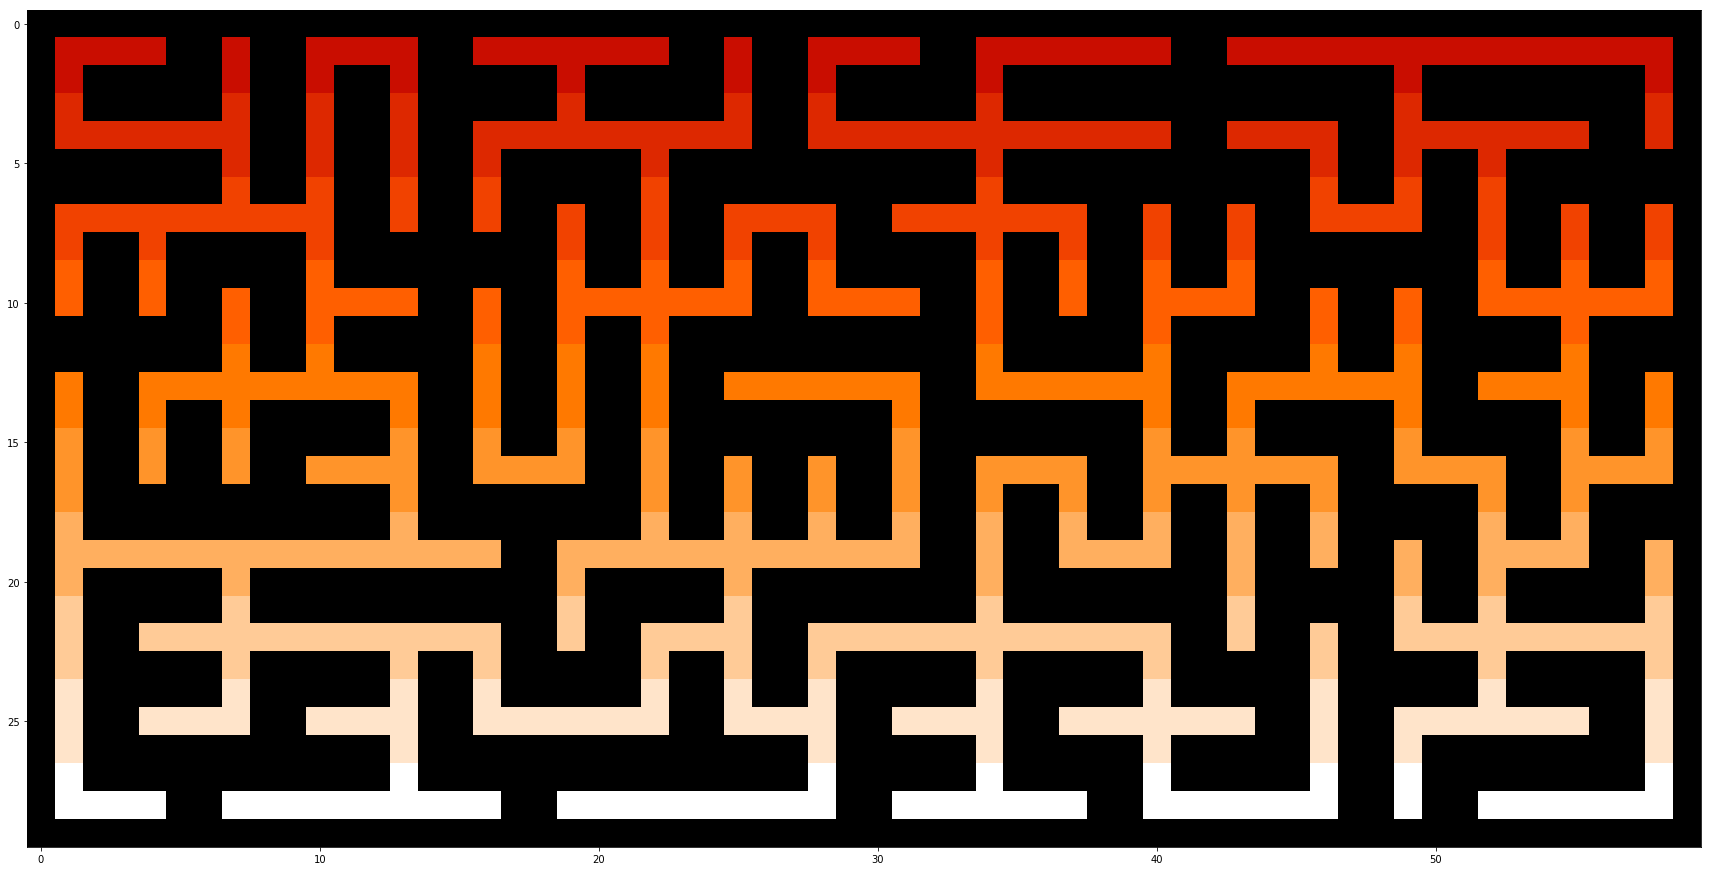

In [21]:
lab = createLab(10, 20)
drawLab(lab, 10, 20)

---
# Segmentation d'image (Partie 1)


## 1. fonction ```formesConnexes```
*Synopsis*
- Une image en noir et blanc étant donnée, construire les images des composantes connexes par arc extraites de cette image.

*Vocabulaire*
- une forme est connexe par arc ssi pour tout couple de points u,v à l'intérieur de la forme, il existe un arc ne quittant pas la forme reliant u et v
- une composante connexe d'une image est une forme connexe maximale

*Entrés / Sorties*
- **Entrée**
    - une matrice 2D dont les valeurs sont dans {0, 1}  
- **Sortie**
    - une liste de composantes connexes, une composante connexe étant une liste des coordonnées des points qui la composent
    
*NB*
- On se placera en 4-connexité, c'est à dire que les points jouxtant $(i,j)$ sont $(i+1, j), (i-1, j), (i, j+1), (i, j-1)$, c'est à dire que l'on ne considérera pas les diagonales.

In [22]:
def formesConnexes(im):
    p = PartitionEntiers2(len(im) * len(im[0]))
    for i in range(len(im)):
        for j in range(len(im[1])):
            if i > 0 and im[i-1][j] == im[i][j]:
                p.fusionner(i + j * len(im), (i-1) + j * len(im))
            if j > 0 and im[i][j-1] == im[i][j]:
                p.fusionner(i + j * len(im), i + (j-1) * len(im))
    lp = p.lister_partition()
    return [[[item % len(im), item // len(im)] for item in lpi] for lpi in lp if len(lpi) > 0 and im[lpi[0] % len(im)][lpi[0] // len(im)] == 1]

In [23]:
im_1 = [[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0]]

fc_1 = formesConnexes(im_1)
display(fc_1)

[[[1, 1], [0, 2], [1, 2], [2, 2], [1, 3]]]

## 2. fonction ```composanteVersImage```
*Entrées*
- $(n,p)$ un couple d'entiers non nuls
- $L$ une liste de couples d'entiers, où pour $\forall (i, j) \in L, 0\leq i<n, \text{ et } 0\leq j<p$

*Sortie*
- $im$ une matrice 2D de dimensions $(n,p)$ d'éléménts dans {0, 1} tel que $\forall (i, j) \in [0..n-1]\times[0..p-1], t[i,j] =0 \text{ ssi } (i,j) \in L$

In [24]:
def composanteVersImage(dim, component):
    im = [[0 for i in range(dim[1])] for j in range(dim[0])]
    for i, j in component:
        im[i][j] = 1
    return im

In [25]:
im_2 = composanteVersImage((3, 5), fc_1[0])

display(im_2)

[[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0]]

# 3. Procedure ```afficheImages```
Ecrire une procédure prenant en entrée une liste d'images et qui en réalise un affichage propre, sous forme d'un tableau d'images.

In [33]:
def afficheImages(listeImages,  nb_max_images = 9, figsize = (20,12)):
    i = max(len(listeImages), nb_max_images)
    fig, ax = plt.subplots(i, 1, figsize=figsize)
    for i in range(len(listeImages)):
        ax[i].imshow(listeImages[i])

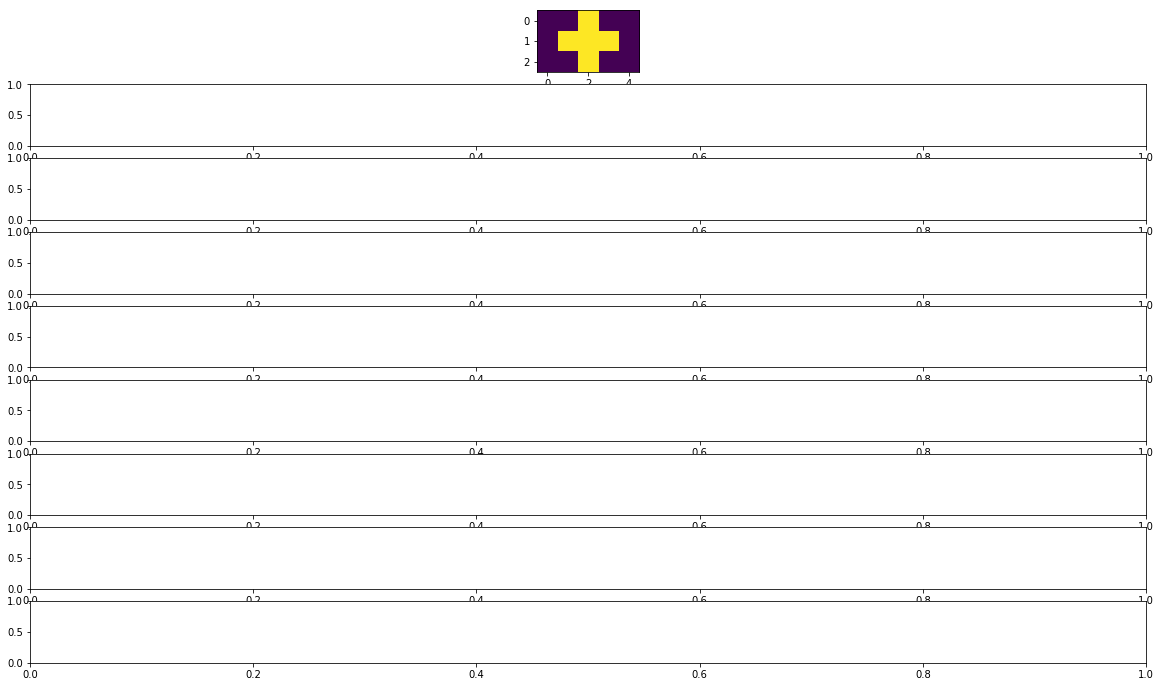

In [34]:
afficheImages([im_2])

## 4. Segmentation d'une image : isoler les mots
- Charger l'image de la base de données 'borges2',
- lui appliquer un flou, (bibliothèque PIL) ; la force du flou est à règler par tatonnement,
- seuiller l'image (choisir par tatonnement un seuil, puis pour tout pixel si sa luminosité est inférieure au seuil, 1, sinon 0),
- calculer les formes connexes de l'image seuillée,
- utiliser les images correspondant à ses composantes comme filtres de sélection sur l'image de départ,  
--> avec les bons seuils, on obtient (dans un monde idéal) autant d'images qu'il y a de mots dans le texte de l'image, avec sur chaque image exactement un mot.

NB : il est possible d'améliorer le résultat en améliorant les traitements réalisés sur l'image avant le calcul des composantes connexes.  
NB2 : les composantes connexes de trop petites taille sont peu intéressantes.

In [28]:
def treatment(im):
    out = im.filter(ImageFilter.SMOOTH_MORE)
    return out

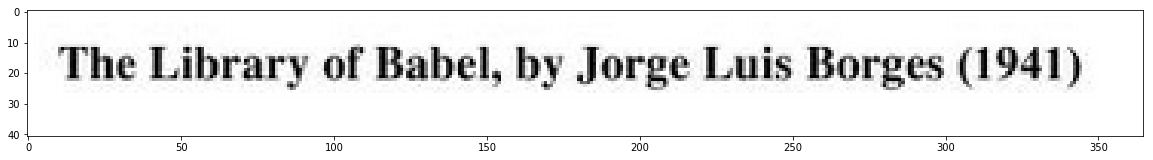

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter

originalImage = Image.open("../input/borges2/lab.png")
width, height = originalImage.size
myOriginalImage = originalImage.getdata()
myOriginalImage = np.asarray(myOriginalImage).reshape([height, width, 4])
myOriginalImage = np.array([[pixel[:3] for pixel in line] for line in myOriginalImage], dtype = np.uint8)

fig, ax = plt.subplots(figsize=(20, 15))
ax.imshow(myOriginalImage,cmap='gray')

In [36]:
myWorkImage = Image.open("../input/borges2/lab.png")
# ICI, on peut placer des traitements de PIL sur l'image myWorkImage
myWorkImage = treatment(myWorkImage)

myImage = myWorkImage.getdata()
myImage = np.asarray(myImage).reshape([height, width, 4])
luminosity = np.array([[np.mean(pixel[:3]) for pixel in line] for line in myImage], dtype = np.uint8)

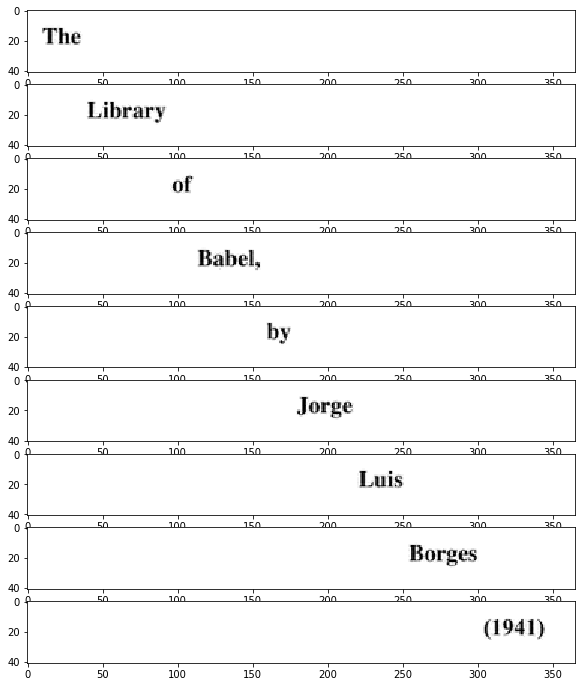

In [38]:
luminosityThreshold = 240
composentThreshold = 10

im = [[0 if l >= luminosityThreshold else 1 for l in r] for r in luminosity]
dim = [len(im), len(im[0])]
fcs = formesConnexes(im)
ims = [composanteVersImage(dim, c) for c in fcs if len(c) > composentThreshold]
ims = [[[myOriginalImage[y][x] if im[y][x] > 0 else [255, 255, 255] for x in range(len(im[y]))] for y in range(len(im))] for im in ims]
afficheImages(ims)

---
# Segmentation dune image (Partie 2), non demandée
Cette application a pour but de réaliser une segmentation multi échelle d'une image. A une échelle donnée, l'image est segmentée en classes. Les pixels sont les éléments à ranger dans les classes, les pixels étant définis par des couples (position, couleur). Au départ, chaque classe correspond exactement à un pixel. Au fur et à mesure de l'algorithme, les classes sont fusionnées. Une fois les classes finales calculées, une couleur est associée à chaque classe (par exemple la moyenne ou la médiane des couleurs de la classe), et l'image est affichée avec ces nouvelles couleurs.

Il existe plusieurs façons classiques de procéder à la fusion des classes
1) Décider de la fonction de distance entre deux pixels ; par exemple choisir la somme des valeurs absolues des écarts sur chacune des trois composantes - Rouge, Vert, Bleu -
2) Décider de la fonction de voisinage ; par exemple, deux classes sont voisinnes ssi elles ont au moins un pixel qui se 'touche' en 4-connexité
2) Décider de la règle de fusion
- min : une classe fusionne avec une classe voisinne ssi la distance minimale entre les pixels de chaque classe est inférieure à un seuil
- max : une classe fusionne avec une classe voisinne ssi la distance maximale entre les pixels de chaque classe est inférieure à un seuil
- moyen : une classe fusionne avec une classe voisinne ssi la distance entre les moyennes des pixels de chaque classe est inférieure à un seuil

Au lieu de procéder en utilisant un seuil, il est possible de réaliser les fusions de façon itérative, en choisissant à chaque itération une fusion de coût minimale.